# Contents

1. [Introduction](#Introduction)
  1. [Big Data & Hadoop](#Big_Data_Hadoop)
  1. [HDFS](#HDFS)
  1. [MapReduce](#MapReduce)
  1. [Apache Spark](#Apache_Spark)
2. [Map & Reduce](#Map_Reduce)
3. [RDD](#RDD)
4. [Key-Value RDD](#Key_Value_RDD)
5. [DataFrame](#DataFrame)
  1. [Pandas-like interface](#Pandas_interface)
  2. [SQL interface](#SQL_interface)

# Introduction
<a id='Big_Data_Hadoop'></a>

![b](http://www.kdnuggets.com/images/cartoon-make-data-great-again.jpg)

## Big data & Hadoop

There was a time when a researcher could gather all available data in their field of knowledge in a small library at home and produce results using a pen and a sheet of paper. With personal computers and laptops we have been able to extend our storage and processing power farther than we ever expected, but they cannot cope with it anymore.

Nowadays, scientific experiments generate such amounts of data that they don't fit in a personal computer, not even in a data center such as PIC. This huge need of computing and storage resources is one of the factors that drive the scientific collaborations worldwide. Also, this dramatic increase in capacity and performance that is needed for current experiments requires specific architectures to store and process all this data.

Big Data platforms are a combination of hardware and software designed to handle massive amounts of data. The most popular one is Hadoop. Hadoop is based on the design originally published by Google in several papers comprising, among others, of a:
 - distributed file system (HDFS)
 - MapReduce programming model

## HDFS

The Hadoop Distributed File System (HDFS) is the basis of the Hadoop platform, and it is built to work on top of commodity computer clusters. In this architecture, dozens up to thousands of cheap computers work in a coordinate manner to store and process the data. Due to the large number of elements involved (computer components, network, power, etc.) the platform was designed from the ground up to be failure tolerant. Should any element fail at any time, the system would detect the condition and recover from it transparently, and the user will not ever notice.

HDFS works by splitting the files in 128 MiB blocks and replicating them on the cluster nodes in such a way that if a node fails, data is still accessible from any other replica.

![HDFS](../resources/hdfs.png)

## MapReduce

MapReduce is programming model used for generating and processing big data sets with parallel and distributed algorithms. Inspired by the map and reduce functions commonly used in functional programming, its key contribution is the scalability and fault-tolerance achieved by optimizing the execution engine.

In MapReduce, data operations are defined with respect to data structured in (key, value) pairs:
 - `Map` takes one pair of data in one data domain and returns a list of pairs in a different domain:
       Map(k1,v1) → list(k2,v2)
   The Map function is applied in parallel to every pair (keyed by k1) in the input dataset. This produces a list of pairs (keyed by k2) for each call. After that, the MapReduce framework collects all pairs with the same key (k2) from all lists and groups them together, creating one group for each key.


 - `Reduce` is then applied in parallel to each group, which in turn produces a collection of values in the same domain:
       Reduce(k2, list (v2)) → list(v3)
   Each Reduce call typically produces either one value v3 or an empty return, though one call is allowed to return more than one value. The returns of all calls are collected as the desired result list.





<a id='Apache_Spark'></a>
## Apache Spark

Is an open-source cluster-computing framework that can run on top of Apache Hadoop. Built on top of MapReduce, if offers an improved interface for non-linear algorithms and operations. Apache Spark is based on a specialized data structure called the resilient distributed dataset (RDD). The use of RDDs facilitates the implementation of iterative algorithms and interactive/exploratory analysis. The latency of Spark applications, compared to a pure MapReduce implementation, may be reduced by several orders of magnitude.

Apache Spark comprises several modules which implement additional processing abilities to the RDDs such as:
 - Spark SQL: structured data like database result sets
 - Spark Streaming: real-time data
 - Spark MLlib: machine learning
 - Spark Graphx: graph processing

For this course, we will introduce the mechanics of working with large datasets using Spark. Ideally, each one of you would have a entire Hadoop cluster to work with but, we are not CERN... so we make use of the ability of Spark to run locally, without a cluster. Later, you could run the same code on top of a Hadoop cluster without changing anything.

<a id='Map_Reduce'></a>
# Map & Reduce

![a](https://cdn.datafloq.com/cms/2015/03/19/big-data-cartoon.jpg)

### Note:

Spark operations can be classified as either:
 - ACTIONS: Trigger a computation and return a result
    - reduce, collect, aggregate, groupBy, take, ...
 - TRANSFORMATIONS: return a new RDD with the transformation applied (think of composing functions)
    - map, reduce, filter, join, ...

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [2]:
# We define our input
l = range(10)
l

range(0, 10)

In [3]:
# We "upload" it as an RDD
rdd = sc.parallelize(l)
rdd

PythonRDD[1] at RDD at PythonRDD.scala:48

### map()

In [4]:
# We define a map function
def power_of_2(k):
    return 2**k

# And we apply it to our RDD
rdd.map(power_of_2)

PythonRDD[2] at RDD at PythonRDD.scala:48

In [5]:
# So we use collect() to retrieve all results.
rdd.map(power_of_2).collect()

### WARNING ###
# Never do that in real cases, or you will transfer ALL data to your browser, effectibly killing it.

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

### reduce()

In [6]:
# What about summing, everything?
# We define a reduce function
def sum_everything(k1, k2):
    return k1 + k2

# And we apply the reduce operation
rdd.reduce(sum_everything)

45

In [7]:
# Or we can use the built in operation `sum`
rdd.sum()

45

### pipelining

In [8]:
# What if I wanted to compute the sum of the powers of 2?
rdd.map(power_of_2).reduce(sum_everything)
# or 
rdd.map(power_of_2).sum()

1023

In [9]:
# How can we count the number of elements in the array?
rdd.count()

10

Ok, too easy, this is supposed to be a map & reduce tutorial...

How can we do it WITHOUT the count() action, just using map & reduce.

**SPOILER**, you could add 1 for each element in the RDD:
 - Build a map function that given an element, it transforms it into a 1.
 - Then apply our `sum_everything` reduce function

In [10]:
def set_to_1(k):
    return 1

rdd.map(set_to_1).reduce(sum_everything)

10

# RDD

In [11]:
# Load all Shakespeare works
import os
shakespeare = sc.textFile(os.path.normpath('file:///../../resources/shakespeare.txt'))

In [12]:
# Show the first lines
shakespeare.take(10)

['This is the 100th Etext file presented by Project Gutenberg, and',
 'is presented in cooperation with World Library, Inc., from their',
 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg',
 'often releases Etexts that are NOT placed in the Public Domain!!',
 '',
 'Shakespeare',
 '',
 '*This Etext has certain copyright implications you should read!*',
 '',
 '<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM']

In [13]:
# Get the longest line
def keep_longest(k1, k2):
    if len(k1) > len(k2):
        return k1
    else:
        return k2

shakespeare.reduce(keep_longest)

"    whither wilt?' ROSALIND. Nay, you might keep that check for it, till you met your"

In [14]:
# Compute the average line length
def line_length(k):
    return len(k)

shakespeare.map(line_length).sum() / shakespeare.count()

42.85645529343704

### flatMap() vs map()

In [15]:
# Split the text in words
def split_in_words(k):
    return k.split()

shakespeare.map(split_in_words).take(2)

[['This',
  'is',
  'the',
  '100th',
  'Etext',
  'file',
  'presented',
  'by',
  'Project',
  'Gutenberg,',
  'and'],
 ['is',
  'presented',
  'in',
  'cooperation',
  'with',
  'World',
  'Library,',
  'Inc.,',
  'from',
  'their']]

In [16]:
shakespeare.flatMap(split_in_words).take(15)

['This',
 'is',
 'the',
 '100th',
 'Etext',
 'file',
 'presented',
 'by',
 'Project',
 'Gutenberg,',
 'and',
 'is',
 'presented',
 'in',
 'cooperation']

### lambda functions

In [17]:
shakespeare.flatMap(
    lambda k: k.split() # Split in words
).take(15)

['This',
 'is',
 'the',
 '100th',
 'Etext',
 'file',
 'presented',
 'by',
 'Project',
 'Gutenberg,',
 'and',
 'is',
 'presented',
 'in',
 'cooperation']

### filter()

In [18]:
# Retrieve 10 words longer than 15 characters
shakespeare.flatMap(
    lambda k: k.split() # Split in words
).filter(
    lambda k: len(k)>15 # Keep words longer than 15 characters
).take(10)

['shaks12.zip*****',
 'julianc@netcom.com',
 '100,000,000=Trillion]',
 'hart@vmd.cso.uiuc.edu',
 'mrcnext.cso.uiuc.edu',
 'hart@vmd.cso.uiuc.edu',
 '>internet:hart@.vmd.cso.uiuc.edu',
 'internet!vmd.cso.uiuc.edu!Hart',
 '(72600.2026@compuserve.com);',
 'self-substantial']

### Exercise

How many times did use the word 'murder'? (**case insensitive**)

In [19]:
shakespeare.flatMap(
    lambda k: k.split()     # Split in words
).map(
    lambda k: k.lower()     # Remove case-sensitiveness issues
).filter(
    lambda k: k == 'murder' # Keep only this word
).count()

44

### Exercise

Show 10 words longer than 15 characters

In [20]:
shakespeare.flatMap(
    lambda k: k.split() # Split in words
).filter(
    lambda k: len(k)>15 # Keep words longer than 15 characters
).take(10)

['shaks12.zip*****',
 'julianc@netcom.com',
 '100,000,000=Trillion]',
 'hart@vmd.cso.uiuc.edu',
 'mrcnext.cso.uiuc.edu',
 'hart@vmd.cso.uiuc.edu',
 '>internet:hart@.vmd.cso.uiuc.edu',
 'internet!vmd.cso.uiuc.edu!Hart',
 '(72600.2026@compuserve.com);',
 'self-substantial']

### Exercise
Show all words longer than 15 characters, but dropping those with any of the following characters (`. , -`)

In [21]:
shakespeare.flatMap(
    lambda k: k.split()                 # Split in words
).filter(
    lambda k: not (set('.,-') & set(k)) # Drop words with special characters
).filter(
    lambda k: len(k)>15                 # Keep words longer than 15 characters
).collect()

['incomprehensible',
 'Gloucestershire;',
 "NORTHUMBERLAND'S",
 "NORTHUMBERLAND'S",
 'Gloucestershire;',
 "Northumberland's",
 'KING_HENRY_VIII|EPILOGUE',
 'enfranchisement!"',
 'misconstruction;',
 'honorificabilitudinitatibus;',
 'Anthropophaginian',
 "disproportion'd;",
 'Gloucestershire;',
 'indistinguishable']

### Exercise

Retrieve the longest word (without `. , -`), reusing the `keep_longest` reduce function.

In [22]:
shakespeare.flatMap(
    lambda k: k.split()                 # Split in words
).filter(
    lambda k: not (set('.,-') & set(k)) # Drop words with special characters
).reduce(
    keep_longest
)

'honorificabilitudinitatibus;'

Which, as you all know, means "the state of being able to achieve honours".

<a id='Key_Value_RDD'></a>
# Key-Value RDD

We want to count the number of appearances of every word

In [23]:
words = shakespeare.flatMap(
    lambda k: k.split()                 # Split in words
).filter(
    lambda k: not (set('.,-') & set(k)) # Drop words with special characters
)

### groupBy()

In [24]:
words.groupBy(lambda k: k).take(10)

[('Quince', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e390>),
 ('heedful', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e400>),
 ('withal?', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e588>),
 ('Bennet', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e470>),
 ('Just', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e7b8>),
 ('enrooted', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e9e8>),
 ('cars;', <pyspark.resultiterable.ResultIterable at 0x7f8ba904ea58>),
 ('divers', <pyspark.resultiterable.ResultIterable at 0x7f8ba904e748>),
 ('Doubtless', <pyspark.resultiterable.ResultIterable at 0x7f8ba904ef28>),
 ("wrapp'd", <pyspark.resultiterable.ResultIterable at 0x7f8ba904ef98>)]

In [25]:
# That method returns an iterable for each different word. This iterable contains a list of all the appearances of the word.
# Lets print its contents

tuples = words.groupBy(lambda k: k).take(5)

for t in tuples:
    print(t[0], list(t[1]))

Quince ['Quince']
heedful ['heedful', 'heedful', 'heedful', 'heedful']
withal? ['withal?', 'withal?', 'withal?', 'withal?', 'withal?', 'withal?', 'withal?']
Bennet ['Bennet']
Just ['Just', 'Just', 'Just', 'Just', 'Just', 'Just', 'Just', 'Just', 'Just', 'Just']


In [26]:
# Now, to compute the number of appearances, we just have to count the elements in the iterator

words.groupBy(
    lambda k: k
).map(
    lambda t: (t[0], len(list(t[1])))
).take(5)

[('Quince', 1), ('heedful', 4), ('withal?', 7), ('Bennet', 1), ('Just', 10)]

In [27]:
# But this is VERY EXPENSIVE in terms of memory,
# as all the word instances must be stored in a list before they can be counted.

# We can do it much better!

### reduceByKey

In [28]:
words.map(
    lambda w: (w, 1)
).take(10)

[('This', 1),
 ('is', 1),
 ('the', 1),
 ('100th', 1),
 ('Etext', 1),
 ('file', 1),
 ('presented', 1),
 ('by', 1),
 ('Project', 1),
 ('and', 1)]

In [29]:
words.map(
    lambda w: (w, 1)
).reduceByKey(
    lambda k1, k2: k1 + k2 
).take(10)

[('Quince', 1),
 ('heedful', 4),
 ('withal?', 7),
 ('Bennet', 1),
 ('Just', 10),
 ('enrooted', 1),
 ('cars;', 1),
 ('divers', 20),
 ('Doubtless', 2),
 ("wrapp'd", 4)]

### Exercise

Get the 10 most-used words and its number of appearances

In [30]:
words.map(
    lambda w: (w, 1)
).reduceByKey(
    lambda k1, k2: k1 + k2 
).sortBy(
    lambda t: t[1],
    ascending=False
).take(10)

[('the', 23242),
 ('I', 19540),
 ('and', 18297),
 ('to', 15623),
 ('of', 15544),
 ('a', 12532),
 ('my', 10824),
 ('in', 9576),
 ('you', 9081),
 ('is', 7851)]

### Exercise

1. Print then 10 most used words longer than 5 characters (case-insensitive)
2. How many words, longer than 50 characters, are used more than 500 times? (case-insensitive)


In [31]:
# 1. Print then 10 most used words longer than 5 characters (case-insensitive)
words.filter(
    lambda w: len(w)>5
).map(
    lambda w: (w.lower(), 1)
).reduceByKey(
    lambda k1, k2: k1 + k2 
).sortBy(
    lambda t: t[1],
    ascending=False
).take(10)

[('should', 1535),
 ('exeunt', 841),
 ('cannot', 719),
 ('before', 689),
 ('though', 611),
 ('against', 586),
 ('second', 563),
 ('master', 506),
 ('better', 501),
 ('therefore', 459)]

In [32]:
# 2. How many words, longer than 5 characters, are used more than 100 times? (case-insensitive)
words.filter(
    lambda w: len(w)>5
).map(
    lambda w: (w.lower(), 1)
).reduceByKey(
    lambda k1, k2: k1 + k2 
).filter(
    lambda t: t[1]>200
).count()

74

# DataFrame

In [109]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [110]:
gaia = sqlc.read.csv('../resources/gaia.csv.bz2', comment='#', header=True, inferSchema=True)
gaia

DataFrame[ra: double, dec: double, mag_g: double, flux_g_error: double]

In [111]:
gaia.count()

1000000

In [112]:
gaia.head(5)

[Row(ra=290.21102203284977, dec=-30.512276670546044, mag_g=19.298657696970963, flux_g_error=2.1969861437903213),
 Row(ra=276.8551136254776, dec=-45.56829255155762, mag_g=19.71404456309139, flux_g_error=2.8153702962592555),
 Row(ra=291.2714016666681, dec=-30.168438928928577, mag_g=19.88970685445606, flux_g_error=2.2826860042571675),
 Row(ra=276.8386275958223, dec=-45.573612128533604, mag_g=18.739001037286407, flux_g_error=3.0656237334224734),
 Row(ra=291.2731316966207, dec=-30.163064937921643, mag_g=18.553687802187834, flux_g_error=7.280203675814308)]

<a id='Pandas_interface'></a>
## Pandas-like interface

In [113]:
%matplotlib inline

import pyspark.sql.functions as func

In [152]:
g_hist = gaia.groupBy(
    (
        func.floor(gaia.mag_g * 10) / 10
    ).alias('mag_g'),
).count().orderBy(
    'mag_g'
)
g_hist.take(10)

[Row(mag_g=4.5, count=1),
 Row(mag_g=5.4, count=1),
 Row(mag_g=5.7, count=1),
 Row(mag_g=5.9, count=1),
 Row(mag_g=6.0, count=1),
 Row(mag_g=6.1, count=2),
 Row(mag_g=6.4, count=1),
 Row(mag_g=6.5, count=2),
 Row(mag_g=6.6, count=1),
 Row(mag_g=6.7, count=1)]

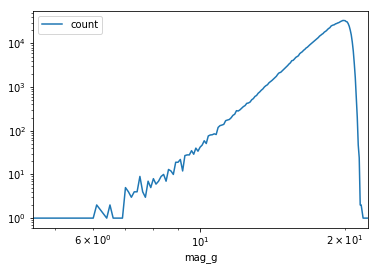

In [153]:
g_hist.toPandas().set_index('mag_g').plot(loglog=True)

### Exercise

Plot an 'ra' histogram in 1-degree bins (count how many stars are in each bin).

Can you spot the galaxy center? ;)

In [156]:
ra_hist = gaia.groupBy(
    (
        func.floor(gaia.ra)
    ).alias('ra'),
).count().orderBy(
    'ra'
)
ra_hist.take(10)

[Row(ra=0, count=861),
 Row(ra=1, count=839),
 Row(ra=2, count=796),
 Row(ra=3, count=697),
 Row(ra=4, count=693),
 Row(ra=5, count=807),
 Row(ra=6, count=656),
 Row(ra=7, count=607),
 Row(ra=8, count=775),
 Row(ra=9, count=923)]

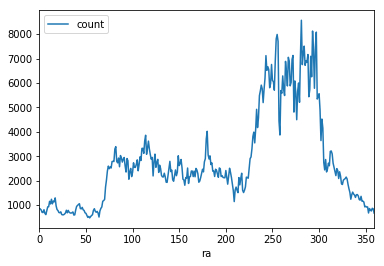

In [157]:
ra_hist.toPandas().set_index('ra').plot()

<a id='SQL_interface'></a>
## SQL interface

In [162]:
sqlc.registerDataFrameAsTable(gaia, "gaia")

g_hist = sqlc.sql("""
    SELECT CAST(FLOOR(mag_g*10)/10. AS FLOAT) AS mag_g, COUNT(*) AS `count`
    FROM gaia
    GROUP BY 1
    ORDER BY 1
""")

g_hist.take(10)

[Row(mag_g=4.5, count=1),
 Row(mag_g=5.400000095367432, count=1),
 Row(mag_g=5.699999809265137, count=1),
 Row(mag_g=5.900000095367432, count=1),
 Row(mag_g=6.0, count=1),
 Row(mag_g=6.099999904632568, count=2),
 Row(mag_g=6.400000095367432, count=1),
 Row(mag_g=6.5, count=2),
 Row(mag_g=6.599999904632568, count=1),
 Row(mag_g=6.699999809265137, count=1)]

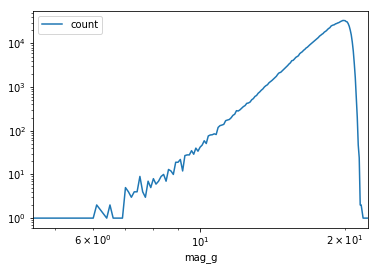

In [163]:
g_hist.toPandas().set_index('mag_g').plot(loglog=True)

### Exercise

Plot an 'ra' histogram in 1-degree bins (count how many stars are in each bin).

Can you spot the galaxy center? ;)

In [165]:
ra_hist = sqlc.sql("""
    SELECT FLOOR(ra) AS ra, COUNT(*) AS `count`
    FROM gaia
    GROUP BY 1
    ORDER BY 1
""")

ra_hist.take(10)

[Row(ra=0, count=861),
 Row(ra=1, count=839),
 Row(ra=2, count=796),
 Row(ra=3, count=697),
 Row(ra=4, count=693),
 Row(ra=5, count=807),
 Row(ra=6, count=656),
 Row(ra=7, count=607),
 Row(ra=8, count=775),
 Row(ra=9, count=923)]

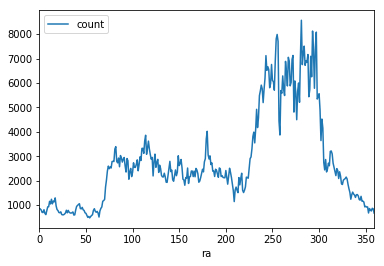

In [167]:
ra_hist.toPandas().set_index('ra').plot()